## Data Science and Business Analytics Intern

# GRIP - The Sparks Foundation

## Author: Boughija Safaa

## Task (1): Prediction using Supervised ML

## Objective: 

In this regression task, we will predict the following:

(1) Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
(2) What will be predicted score if a student studies for 9.25 hrs/ day?

This is a "Simple Linear Regression" task as it involves just two variables.

# Importing all relevant Libraries

In [8]:

# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


# Dataset

In [9]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.shape

(25, 2)

# Statistical Details

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


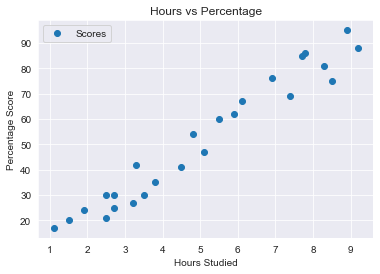

In [12]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Exploratory data analysis

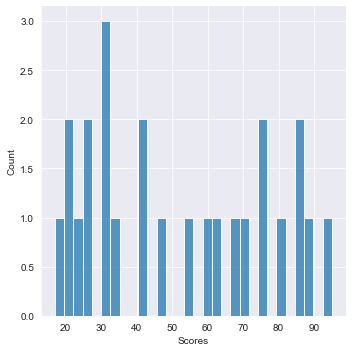

In [13]:
import seaborn as sns

sns.set_style('darkgrid')

sns.displot(df['Scores'],kde=False,bins=30)

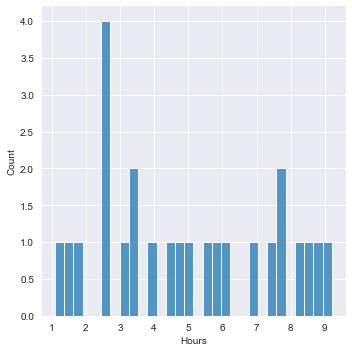

In [14]:
sns.set_style('darkgrid')

sns.displot(df['Hours'],kde=False,bins=30)

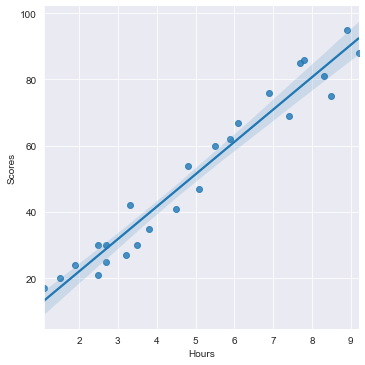

In [15]:
sns.lmplot(x='Hours',y='Scores',data=df)

# Preparing the Data

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#y = a*X+b; b is the intercept 
print(regressor.intercept_)

2.018160041434683


In [20]:
#For retrieving the slope (a)
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.


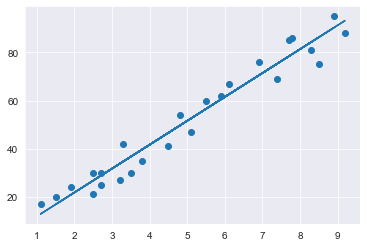

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones.

# Evaluating the Algorithm

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.